## Data Science Workshop-2 (CSE 2196)
### ASSIGNMENT-3(Linear and Polynomial Regression)

### Name: Anish Kumar
### Regd. No: 2241011101
### Section: 2241007

###### 1. Explain normal equation method to estimate the parameters of multiple linear regression. Write a function for it.

The normal equation is a one-step algorithm that finds the coefficients that minimize the loss function.

$$
\theta = (X^T X)^{-1} X^Ty
$$

Where:
- theta is the vector of parameters (coefficients).
- X is the matrix of input features (with a column of ones added if an intercept is desired).
- y is the vector of target values.

In [22]:
import numpy as np
def multiple_linear_regression_normal_eq(X, y):
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]  # X_with_intercept
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Generate random data
X=2*np.random.randn(100,1)
y=4+3*X+np.random.randn(100,1)
theta=multiple_linear_regression_normal_eq(X, y)
print(theta)

[[4.07598172]
 [3.02463618]]


###### 2. A college professor believes that if the grade for internal examination is high in a class, the grade for external examination will also be high. A random sample of 10 students are selected, and the data is as follows: 

Marks_internal examination (X)= [ 15, 23, 18, 23, 24, 22, 22, 19, 19, 16]

Marks_external examination (Y) = [49, 63, 58, 60, 58, 61, 60, 63, 60, 52]

Find the polynomial regression model of degree 3 and linear regression model from the above data.

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Given data
X = np.array([15, 23, 18, 23, 24, 22, 22, 19, 19, 16]).reshape(-1, 1)
y = np.array([49, 63, 58, 60, 58, 61, 60, 63, 60, 52])

# Polynomial regression model of degree 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
print("Polynomial Regression model of degree 3:")
print("Intercept: ", poly_model.intercept_)
print("Coefficients: ", poly_model.coef_[1:4])

# Linear regression model
linear_model = LinearRegression().fit(X, y)
print("\nLinear Regression model:")
print("Intercept: ",linear_model.intercept_)
print("Coefficient: ",linear_model.coef_)

Polynomial Regression model of degree 3:
Intercept:  -103.81796009490026
Coefficients:  [ 1.57135372e+01 -3.66067751e-01 -2.86182579e-04]

Linear Regression model:
Intercept:  37.463442069741276
Coefficient:  [1.0416198]


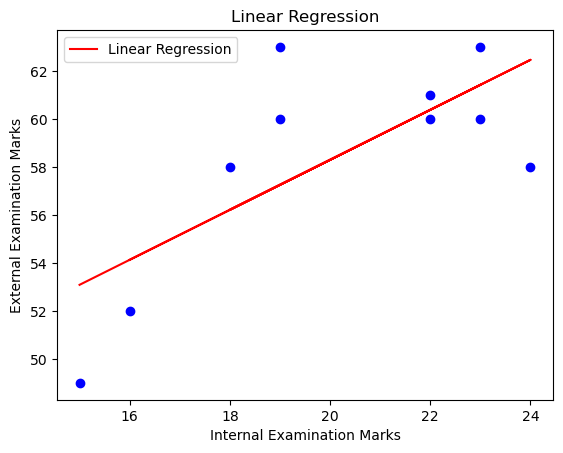

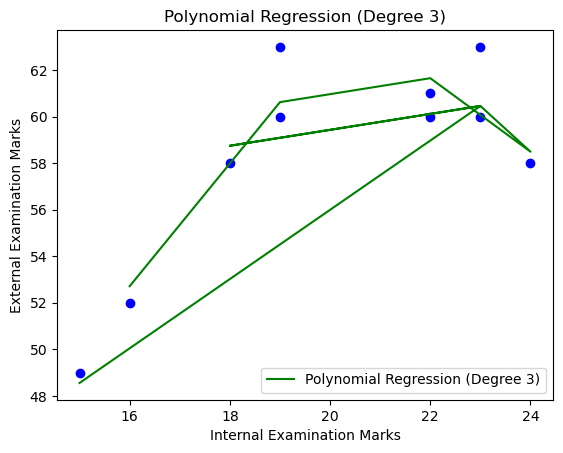

In [46]:
# Plotting the Linear regression results
plt.scatter(X, y, color='blue')
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Internal Examination Marks')
plt.ylabel('External Examination Marks')
plt.legend()
plt.show()

# Plotting the polynomial regression results
plt.scatter(X, y, color='blue')
plt.plot(X, poly_model.predict(X_poly), color='green', label='Polynomial Regression (Degree 3)')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('Internal Examination Marks')
plt.ylabel('External Examination Marks')
plt.legend()
plt.show()

###### 3.Explain Gradient Descent method in context of linear regression.

Gradient descent is an algorithm that minimizes the cost function in linear regression by updating the model's parameters in the opposite direction of the gradient. The goal is to find the best-fit line for a given training dataset in a smaller number of iterations.

###### 4. List and explain the issues of Linear Regression model. 

Multicollinearity:
When two or more independent variables are strongly correlated. This strong correlation can be a major problem in linear regression analysis.

Outliers:
Outliers can affect the performance of the model.

Overfitting:
This happens when a model is excessively complex and fits the random noise in the data, leading to poor performance on new data.

Heteroscedasticity:
This can violate the assumption of homoscedasticity, which is that the variance of the errors is constant across all levels of the predictor variable(s).

Sample Size: 
Small sample sizes can lead to unreliable estimates and low statistical power.

Autocorrelation:
When the current value of the dependent variable depends on its previous value, this is called auto correlation. In such cases, the R-Square, which measures how well the model is performing, may not make sense. 

######  5. Write the difference between gradient descent and normal equation method for regression coefficients estimation.

Gradient Descent:
1. In gradient descent, we need to choose the learning rate, Number of iterations, and another hyperparameter.
2. It is an iterative algorithm.
3. Gradient descent works well with large number of features.
4. Feature scaling can be used.
5. No need to handle non-invertibility cases. 

Normal Equation Method:
1. In the normal equation, there is no need to choose the learning rate.
2. It is an analytical approach.
3. Normal equation works well with small number of features.
4. No need for feature scaling.
5. If (X X) is non-invertible, regularization can be used to handle this.

###### 6.  What is difference between simple linear and multiple linear regressions?

 Simple Linear Regression:
 1. Models the relationship between one dependent and one independent variable.
 2. Equation is given by Y = C0 + C1X + e
 3. Linearity, Independence, Homoscedasticity, Normality.
 4. Risk of overfitting is lower, as it deals with only one predictor.
 5. Uses: Basic research, simple predictions, understanding a singular relationship.

 Multiple Linear Regression:
 1. Models the relationship between one dependent and two or more independent variables.
 2. Equation is given by Y = C0 + C1X1 + C2X2 + C3X3 + ….. + CnXn + e
 3. Same as linear regression, with the added concern of multicollinearity.
 4. Risk of overfitting is higher, especially if too many predictors are used without adequate data.
 5. Uses: Complex research, multifactorial predictions, studying interrelated systems.

###### 7. Suppose we have data for a retail company. The company wants to understand how their advertising expenses in various channels (e.g., TV, Radio) impact sales. Predict sales using Multiple Regression model using both TV and Radio advertising expenses for the following dataset.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = {'TV': [127.44, 135.76, 130.14, 127.24, 121.18, 132.29, 121.88, 144.59, 148.18, 119.17],
        'Radio': [66.95, 56.75, 68.38, 74.05, 56.22, 64.40, 64.80, 64.31, 55.58, 73.82],
        'Sales': [716.54, 660.01, 658.56, 679.68, 632.94, 751.38, 691.32, 732.85, 691.15, 693.58]}
df = pd.DataFrame(data)
X = df[['TV', 'Radio']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Intercept: ", model.intercept_)
print("TV Coefficient: ", model.coef_[0])
print("Radio Coefficient: ", model.coef_[1])
r_squared = model.score(X, Sales)
print("Score: ", r_squared)

Intercept:  235.047475320719
TV Coefficient:  2.812471079297124
Radio Coefficient:  1.494936830746147
Score:  0.11354890912902726


In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression

TV = np.array([127.44, 135.76, 130.14, 127.24, 121.18, 132.29, 121.88, 144.59, 148.18, 119.17]).reshape(-1, 1)
Radio = np.array([66.95, 56.75, 68.38, 74.05, 56.22, 64.40, 64.80, 64.31, 55.58, 73.82]).reshape(-1, 1)
Sales = np.array([716.54, 660.01, 658.56, 679.68, 632.94, 751.38, 691.32, 732.85, 691.15, 693.58])

# Combine TV and Radio into one array
X = np.hstack((TV, Radio))
model = LinearRegression()
model.fit(X, Sales)

# Print the coefficients of the model
print("Intercept: ", model.intercept_)
print("TV Coefficient: ", model.coef_[0])
print("Radio Coefficient: ", model.coef_[1])
r_squared = model.score(X, Sales)
print("Score: ",r_squared)

Intercept:  240.56167150616523
TV Coefficient:  2.0801621849979033
Radio Coefficient:  2.761385438497878
Score:  0.3162687845623481
